# 3. 신경망

## 3.1 퍼셉트론에서 신경망으로

### 3.1.3 활성활 함수의 등장
- 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 활성화 함수
- 이름 그대로 입력신호의 총합들이 활성화를 일으키는지 정하는 역할을 한다.

> 일반적으로 단층 퍼셉트론은 단층 네트워크에서 계단함수를 활성화 함수로 사용한 모델을 가르키고, 다층 퍼셉트론은 여러 층의 네트워크에서 시그모이드, ReLu, LeakyReLu 등 매끈한 활성화 함수를 사용하는 네트워크를 가르킨다.

## 3.2 활성화 함수

### 3.2.1 시그모이드 함수

#### h(x) = 1 / ( 1 + e^(-x) )   
* e는 자연상수를 의미한다.

### 3.2.2 계단 함수 구현하기

In [5]:
# 이 방법은 배열은 못 받아준다.
def step_function(x):
    if x > 0:
        x = 1
        return x
    else:
        x = 0
        return x

In [16]:
# 이렇게 하면 배열에 대한 계단 함수 구현이 가능하다.
def step_function(x):
    import numpy as np
    x = np.array(x)
    y = x > 0
    return y.astype(np.int)

In [17]:
x = [1.0, -2, 2.4, -0.4]
step_function(x)

array([1, 0, 1, 0])

### 3.2.3 계단함수의 그래프

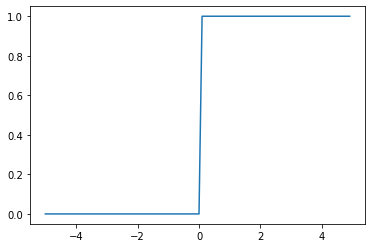

In [19]:
import numpy as np
import matplotlib.pylab as plt
x = np.arange(-5 , 5, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [27]:
# 지수 표현 방법 바꿔주기
np.set_printoptions(precision=5, suppress=True)
def sigmoid(x):
    x = np.array(x)
    h = 1 / ( 1 + np.exp(-x))
    return h

In [29]:
sigmoid([-1,1,-3,3,10,-10])

array([0.26894, 0.73106, 0.04743, 0.95257, 0.99995, 0.00005])

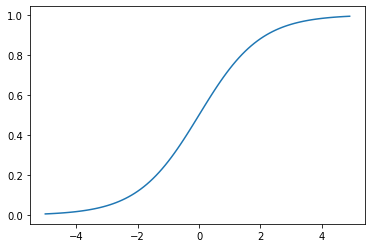

In [30]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)
plt.plot(x,y)

### 3.2.5 계단함수와 시그모이드 함수 비교
- 시그모이드 함수는 계단함수와 다르게 출력값이 연속형 실수이다.
- 계단함수와 공통점으로는 0과 1사이의 값을 출력해준다는 것과 비선형 함수라는 점이다.

### 3.2.6 비선형 함수

- 신경망에서는 황성화 함수를 반드시 비선형 함수를 사용해야 한다.
- 선형함수를 이용하면 신경망의 층을 깊게하는 의미가 없어지기 때문이다.

### 3.2.7 ReLU 함수
- 0이 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수이다.

In [43]:
# h(x) = x (x > 0)
#      = 0 (x < 0)

In [44]:
def ReLU(x):
    return np.maximum(0,x)

In [45]:
ReLU([0,-5,-10,-20,1,10,20])

array([ 0,  0,  0,  0,  1, 10, 20])

## 3.4 3층 신경망 구현하기

In [62]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)
print(Z1)

W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2,W3) + B3
Y = A3

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]
[0.57444 0.66819 0.75026]
(3,)
(3, 2)
(2,)
[0.62625 0.77101]


In [63]:
Y

array([0.31683, 0.69628])

## 3.5 출력층 설계하기
- 출력층의 활성화 함수는 풀고자하는 문제에 맞게 정해야한다.
- 회귀에서는 항등함수를, 분류에서는 (2클래스 시그모이드, 다중 클래서 소프트 맥스)


### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [64]:
# Yk = exp(Ak) / exp(A1) + exp(A2) + ... + exp(An)
# k = k번째 출력
# A = 출력층의 활성화 함수 적용 전 수들의 배열
# n = 출력층 뉴런의 수

In [65]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

[ 1.34986 18.17415 54.59815]


In [67]:
sum_exp_a = exp_a.sum()
print(sum_exp_a)

74.1221542101633


In [68]:
y = exp_a / sum_exp_a
print(y)

[0.01821 0.24519 0.7366 ]


In [72]:
# 위 방법은 e^100이 되면 오버플로 문제를 야기할 수 있다.
def softmax(a):
    # 최대값을 빼준다.
    c = np.max(a)
    exp_a = np.exp(a-c)
    
    sum_exp_a = exp_a.sum()
    return exp_a / sum_exp_a

print(softmax([0,1,2]))
print(softmax([10000,10001,10002]))

[0.09003 0.24473 0.66524]
[0.09003 0.24473 0.66524]


- 소프트맥스 함수 또한 0~1 사이의 연속형 변수를 출력해준다. 또 출력 총합이 1이 된다.
- 소프트맥수 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다. y = exp(x) 가 단조 증가 함수이기 때문이다. 
> a 들 사이에서의 대소관계가 y에서의 대소관계와 동일하다. 현업에서는 출력층의 소프트 맥스 함수는 생략하는 것이 일반적이다.(학습 시킬 때는 사용해야함)

### 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터 셋

In [89]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [109]:
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img_show(x_train[0])

In [142]:
x_train = x_train.reshape(60000,28*28)
x_test = x_test.reshape(10000,28*28)
x_train = x_train / 255.0
x_test = x_test / 255.0

### 3.6.2 신경망의 추론 처리

In [143]:
import pickle
def init_network():
    with open('./data/sample_weight.pkl','rb') as f:
        network = pickle.load(f)
        
    return network
network = init_network()

In [144]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [145]:
len(x_test)

10000

In [146]:
x_test.shape, y_test.shape

((10000, 784), (10000,))

In [151]:
accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = np.argmax(y)
    if p == y_test[i]:
        accuracy_cnt += 1
print(float(accuracy_cnt) / len(x))

93.52


### 3.6.3 배치 처리
- 배치처리는 컴퓨터로 계산할 때 이미지 1장당 처리 시간을 대폭 줄여준다.
- 이유 1. 수치 계산 라이브러리 대부분이 큰 배열을 효율적으로 처리할 수 있도록 최적화 되어 있다.
- 이유 2. 커다란 신경망에서 데이터 전송이 병목으로 작용하는 경우가 자주 있는데, 이러한 부하를 줄일 수 있다.

In [152]:
batch_size = 100
accuracy = 0
for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy += np.sum(p == y_test[i : i + batch_size])

print(accuracy / len(x_test))

0.9352
